# Các thuật toán sắp xếp

Thuật toán sắp xếp được sử dụng khi cần sắp xếp một tập có cùng kiểu dữ liệu theo một quy luật nào đó 

Ví dụ như:

- Sắp xếp một tập số theo thứ tự từ bé đến lớn

- Sắp xếp tập các xâu theo thứ tự từ điển

- ...

## Sắp xếp nổi bọt (Bubble Sort)
- Xét lần lượt các cặp 2 phần tử liên tiếp. Nếu phần tử đứng sau nhỏ hơn phần tử đứng trước, ta đổi chỗ 2 phần tử. Nói cách khác, phần tử nhỏ nhất sẽ nổi lên trên.
- Lặp lại đến khi không còn 2 phần tử nào thỏa mãn. Có thể chứng minh được số lần lặp không quá N−1, do một phần tử chỉ có thể nổi lên trên không quá N−1 lần.

Độ phức tạp O(N^2)
, không đủ nhanh với dữ liệu lớn.

In [2]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

my_arr = [64, 34, 25, 12, 22, 11, 90]
sorted_arr = bubble_sort(my_arr)
print(sorted_arr)

[11, 12, 22, 25, 34, 64, 90]


## Sắp xếp chèn (Insertion Sort)
Ý tưởng chính của thuật toán là ta sẽ sắp xếp lần lượt từng đoạn gồm 1 phần tử đầu tiên, 2 phần tử đầu tiên, …, N
 phần tử.

Giả sử ta đã sắp xếp xong i
 phần tử của mảng. Để sắp xếp i+1
 phần tử đầu tiên, ta tìm vị trí phù hợp của phần tử thứ i+1
 và "chèn" nó vào đó.
 
Độ phức tạp O(N2)
, không đủ nhanh với dữ liệu lớn.

In [3]:
def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        
        j = i - 1
        while j >= 0 and key < arr[j]:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key

    return arr

my_arr = [7, 4, 2, 8, 9, 1, 5]
sorted_arr = insertion_sort(my_arr)
print(sorted_arr)

[1, 2, 4, 5, 7, 8, 9]


## Sắp xếp trộn (Merge sort)
Sắp xếp trộn hoạt động kiểu đệ quy:

Đầu tiên chia dữ liệu thành 2 phần, và sắp xếp từng phần.

Sau đó gộp 2 phần lại với nhau. Để gộp 2 phần, ta làm như sau:
- Tạo một dãy A
 mới để chứa các phần tử đã sắp xếp.
- So sánh 2 phần tử đầu tiên của 2 phần. Phần tử nhỏ hơn ta cho vào A
 và xóa khỏi phần tương ứng.

Tiếp tục như vậy đến khi ta cho hết các phần tử vào dãy A


In [8]:
def merge_sort(arr):
    if len(arr) > 1:
        mid = len(arr) // 2
        
        left = arr[:mid]
        right = arr[mid:]

        merge_sort(left)
        merge_sort(right)

        i = j = k = 0

        while i < len(left) and j < len(right):
            if left[i] < right[j]:
                arr[k] = left[i]
                i += 1
            else:
                arr[k] = right[j]
                j += 1
            k += 1

        while i < len(left):
            arr[k] = left[i]
            i += 1
            k += 1
            
        while j < len(right):
            arr[k] = right[j]
            j += 1
            k += 1
    return arr

my_arr = [7, 4, 2, 8, 9, 1, 5]
sorted_arr = merge_sort(my_arr)
print(sorted_arr)

[1, 2, 4, 5, 7, 8, 9]


## Sắp xếp vun đống (HeapSort)
Ý tưởng của thuật toán Heap Sort là sử dụng cấu trúc heap để sắp xếp danh sách. Heap là một cấu trúc dữ liệu gần giống như cây nhị phân, nơi mà các nút con luôn nhỏ hơn hoặc bằng nút cha của chúng.
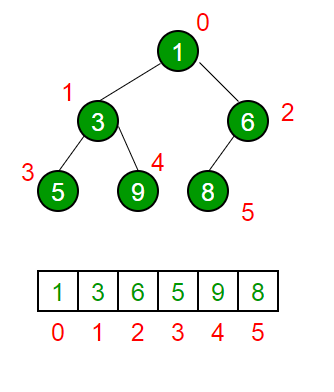
Thuật toán Heap Sort bắt đầu bằng cách chuyển danh sách trở thành heap, hay là cây nhị phân, theo quy tắc heap - một min heap hoặc max heap. Sau khi chuyển danh sách sang dạng cây nhị phân, chúng ta sẽ đẩy phần tử lớn nhất hay nhỏ nhất vào cuối danh sách bằng cách tráo đổi phần tử cuối của danh sách với phần tử đầu tiên của list và loại bỏ phần tử lớn nhất hoặc nhỏ nhất này khỏi danh sách. Cuối cùng, chúng ta giảm kích thước heap đi một và thực hiện hoạt động tráo đổi cho đến khi heap rỗng.

In [9]:
def heapify(arr, n, i):
    largest = i
    l = 2 * i + 1
    r = 2 * i + 2

    if l < n and arr[i] < arr[l]:
        largest = l

    if r < n and arr[largest] < arr[r]:
        largest = r

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[0], arr[i] = arr[i], arr[0]
        heapify(arr, i, 0)

    return arr

# ví dụ cách sử dụng:
my_arr = [1, 3, 6, 5, 9, 8]
sorted_arr = heap_sort(my_arr)
print(sorted_arr)


[1, 3, 5, 6, 8, 9]


## Sắp xếp nhanh (QuickSort)
Ý tưởng của thuật toán Quicksort là sử dụng phương pháp chia để trị để sắp xếp danh sách.

Thuật toán Quicksort lấy một phần tử làm chốt (pivot) và sử dụng nó để chia danh sách thành hai phần, một phần chứa tất cả các phần tử nhỏ hơn hoặc bằng chốt và một phần chứa tất cả các phần tử lớn hơn chốt. Sau đó, Quicksort được đệ quy áp dụng cho cả hai phần này, cho đến khi danh sách đã được sắp xếp hoàn chỉnh.

Cụ thể, thuật toán Quicksort được triển khai như sau:

- Chọn phần tử chốt (pivot) trong danh sách làm trung tâm của việc chia.

- Phân chia danh sách thành hai danh sách con: một danh sách con chứa tất cả các phần tử nhỏ hơn hoặc bằng chốt và một danh sách con chứa tất cả các phần tử lớn hơn chốt.

- Đệ quy Quicksort trên cả hai danh sách con.

- Kết hợp danh sách con đã sắp xếp vào một danh sách hoàn chỉnh.

In [10]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    else:
        pivot = arr[0]
        left = []
        right = []
        for i in range(1, len(arr)):
            if arr[i] < pivot:
                left.append(arr[i])
            else:
                right.append(arr[i])
        return quicksort(left) + [pivot] + quicksort(right)

my_arr = [7, 4, 2, 8, 9, 1, 5]
sorted_arr = quicksort(my_arr)
print(sorted_arr)


[1, 2, 4, 5, 7, 8, 9]


## Hàm sort có sẵn
Thông thường, các ngôn ngữ lập trình sẽ có sẵn các hàm sắp xếp bên trong các thư viện

In [11]:
number_list = [7, 5, 8, 2, 4, 1, 3]
sorted(number_list)

[1, 2, 3, 4, 5, 7, 8]